## Ejercicios de Pandas
___
___
### Ejercicios Filtrado y Visualización:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Spotify_Youtube_clean.csv', index_col='Unnamed: 0')

pd.options.display.max_columns = None
df.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,feel good inc.,demon days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.177,0.00836,0.00233,0.613,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,gorillaz - feel good inc. (official video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09


- ¿Cuáles son los valores únicos de la columna "album_type"? Cread tres dataframes diferentes, uno para cada tipo de "album_type". ¿Cuántas canciones tenemos en cada tipo?

In [3]:
df['album_type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

In [4]:
df_album = df[df['album_type'] == 'album']
df_single = df[df['album_type'] == 'single']
df_compilation = df[df['album_type'] == 'compilation']

In [5]:
print(f'Para el tipo "album" hay {df_album.shape[0]} canciones.')
print(f'Para el tipo "single" hay {df_single.shape[0]} canciones.')
print(f'Para el tipo "compilation" hay {df_compilation.shape[0]} canciones.')

Para el tipo "album" hay 14926 canciones.
Para el tipo "single" hay 5004 canciones.
Para el tipo "compilation" hay 788 canciones.


___
- Usando el dataframe de los albumes que hemos creado en el ejercicio anterior. ¿Cuál es la media y la desviación estándar de "danceability", "acousticness" y "speechiness" de cada artista?. Mostrad los resultados en tres dataframes diferentes, uno para cada métrica ("danceability", "acousticness" y "speechiness"). Ordenar los resultados de mayor a menor en base a la media.

In [6]:
# Unimos los dosdataframes:
df_danceability = df_album.groupby('artist')['danceability'].agg(['mean', 'std']).sort_values(by='mean', ascending = False).reset_index()
df_danceability.head()

,artist,mean,std
0,Latto,0.922333,0.014503
1,Murda,0.911500,0.030406
2,Jon Z,0.886000,0.015556
3,Blueface,0.885000,0.043782
4,Jung Kook,0.881000,NaN


In [7]:
# Vemos que hay un `Nan` en `danceability_std`, pero no en `danceability_mean`. Vamos a comprobar qué puede estar pasando:
df_album[df['artist'] == 'Jung Kook']

/tmp/ipykernel_1344/3564773348.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_album[df['artist'] == 'Jung Kook']


,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
20683,Jung Kook,https://open.spotify.com/artist/6HaGTQPmzraVma...,left and right (feat. jung kook of bts),charlie,album,spotify:track:5Odq8ohlgIbQKMZivbWkEo,0.881,0.592,2.0,-4.898,0.0324,0.619,0.000013,0.0901,0.719,101.058,154487.0,https://www.youtube.com/watch?v=a7GITgqwDVg,charlie puth - left and right (feat. jung kook...,Charlie Puth,293367976.0,8016899.0,540887.0,Charlie Puth - Left And Right (feat. Jung Kook...,True,True,NaN


    -> Como era de esperar, se debe a que este artista solo tiene una canción (la media de danceability es igual a su valor, pero la desviación típica no puede calcularla).

In [8]:
# Vamos a comprobar que todos los nulos en `danceability` coincidan con artistas que solo tienen 1 canción:

df_danceability['std'].isnull().sum()

65

In [9]:
#Vamos a ver ahora cuántos artistas tienen únicamente 1 canción en nuestro dataframe df_album:
(df_album.groupby('artist')['track'].count() == 1).sum()

65

    -> Los datos de nulos que hemos obtenido, eran correctos. Seguimos adelante con el resto de dataframes

In [10]:
df_acousticness = df_album.groupby('artist')['acousticness'].agg(['mean', 'std']).sort_values(by='mean', ascending = False).reset_index()
df_acousticness.head()

,artist,mean,std
0,Claude Debussy,0.993714,0.001380
1,Robert Schumann,0.993444,0.004902
2,Franz Schubert,0.989500,0.005237
3,Edvard Grieg,0.989500,0.007863
4,Frédéric Chopin,0.989286,0.004071


In [11]:
df_speechiness = df_album.groupby('artist')['speechiness'].agg(['mean', 'std']).sort_values(by='mean', ascending = False).reset_index()
df_speechiness.head()

,artist,mean,std
0,Sir Arthur Conan Doyle,0.9523,0.008845
1,Bibi Blocksberg,0.9453,0.011879
2,Sherlock Holmes,0.9393,0.015833
3,TKKG,0.9193,0.023542
4,Fünf Freunde,0.9062,0.048960


___
- Se quiere estudiar si existe una relación entre la cantidad de visitas que reciben los videos de música de un artista en una plataforma de streaming y la cantidad de likes que estos videos obtienen. Por lo tanto, querremos contestar a la siguiente pregunta: ¿Son aquellos artistas que tienen más visitas los que más likes tienen? Para solucionar este ejercicio deberéis:
    - Agrupar por artista y calcular la media de visitas y de likes.
    - Quedaros con los 10 artistas que más visitas han tenido.
    - Quedaros con los 10 artistas que más likes han tenido.
    - Haced un subplot, donde en uno tengamos los 10 artistas con más likes y en el otro los 10 artistas con mas views.

In [12]:
# Vamos a comprobar qué artistas son top10 en visualización:
artist_moreviews = df.groupby('artist')['views'].mean().sort_values(ascending = False).reset_index().head(10)
artist_moreviews

,artist,views
0,Ed Sheeran,1.546021e+09
1,CoComelon,1.460167e+09
2,Katy Perry,1.312063e+09
3,Charlie Puth,1.216759e+09
4,Luis Fonsi,1.162811e+09
5,Justin Bieber,1.099106e+09
6,Daddy Yankee,1.087193e+09
7,Bruno Mars,1.024092e+09
8,Macklemore & Ryan Lewis,1.012206e+09
9,Coldplay,9.997278e+08


In [13]:
# Vamos a comprobar qué artistas son top10 en likes:
artist_morelikes = df.groupby('artist')['likes'].mean().sort_values(ascending = False).reset_index().head(10)
artist_morelikes

,artist,likes
0,BTS,13940380.8
1,BLACKPINK,13230250.5
2,Charlie Puth,8633692.5
3,Ed Sheeran,8354331.9
4,Justin Bieber,7858434.8
5,Billie Eilish,7333853.7
6,Imagine Dragons,7227447.7
7,Alan Walker,6797770.2
8,DJ Snake,6777583.1
9,Luis Fonsi,6690848.9


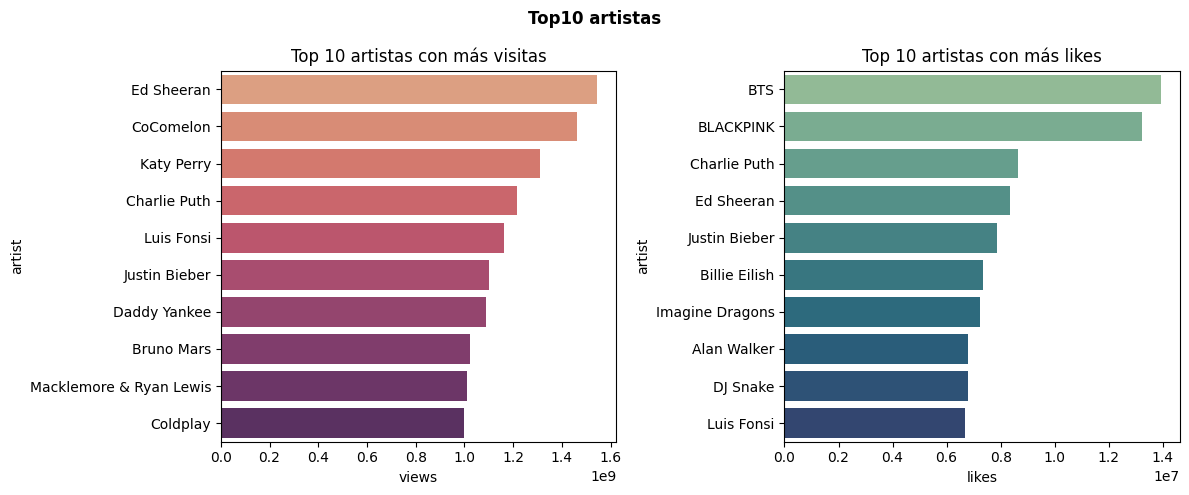

In [14]:
fig,axes = plt.subplots(1,2, figsize= (12, 5))

fig.suptitle('Top10 artistas', fontweight='bold')

sns.barplot(x= 'views', y= 'artist', data = artist_moreviews, ax = axes[0], palette = 'flare')
sns.barplot(x= 'likes', y= 'artist', data = artist_morelikes, ax = axes[1], palette = 'crest')

axes[0].set_title('Top 10 artistas con más visitas')
axes[1].set_title('Top 10 artistas con más likes')

fig.tight_layout();

In [15]:
# Vamos a ver qué artistas están tanto en el Top10 de visualización como en el de likes:
artist_morelikes[artist_morelikes['artist'].isin(artist_moreviews['artist'])]['artist']

2     Charlie Puth
3       Ed Sheeran
4    Justin Bieber
9       Luis Fonsi
Name: artist, dtype: object

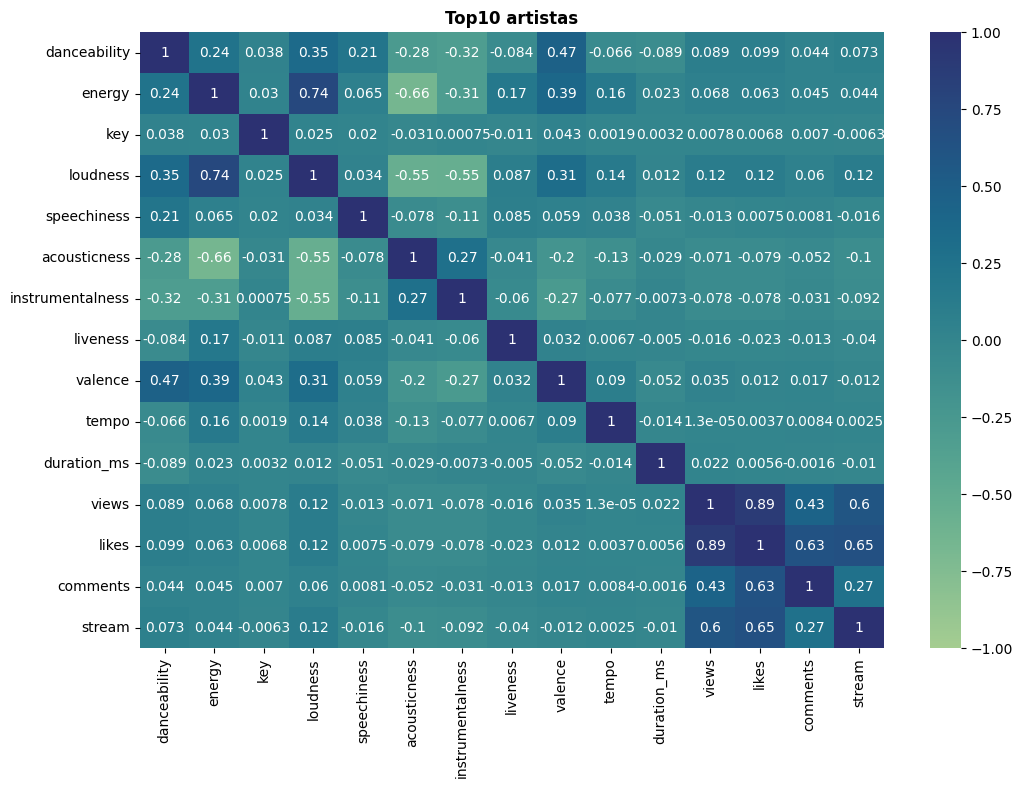

In [16]:
# Ahora vamos a ver si existe relación entre los likes y las views:
plt.figure(figsize = (12,8))
plt.title('Top10 artistas', fontweight='bold')
sns.heatmap(df.corr(numeric_only = True), cmap = "crest", annot = True,
            vmin = -1, vmax = 1);

Efectivamente, vemos que la correlación entre `likes` y `views` es muy alta (y positiva): a mayor visitas, más likes.
Pero también, que también están correlacionadas de manera positiva `loudness` y `energy`: a mayor valor en `loudness`, mayor valor en `energy`.
Hay otras variables que también apuntan cierta correlación, pero no llega a ser alta (entre 0.7 y -0.7).

___
- **BONUS** Haced lo mismo para los datos de tipo "single".

In [17]:
def views_likes(dataframe):
    ''' Esta función aporta información sobre los artistas con más views y más likes.
    Parámetro: Recibe un único parámetro: el dataframe a utilizar
    Resultado: 
        - Imprime los 10 artistas con vás visitas frente a los 10 artistas con más likes.
        - Indica qué artistas se encuentran tanto en el top10 de visitas como de likes'''
        
    artist_moreviews = dataframe.groupby('artist')['views'].mean().sort_values(ascending = False).reset_index().head(10)
    artist_morelikes = dataframe.groupby('artist')['likes'].mean().sort_values(ascending = False).reset_index().head(10)
    
    # Creamos el gráfico a imprimir (primer resultado de la función):  
    fig,axes = plt.subplots(1,2, figsize= (12, 5))
    fig.suptitle('Top10 artistas', fontweight='bold')
    sns.barplot(x= 'views', y= 'artist', data = artist_moreviews, ax = axes[0], palette = 'flare')
    sns.barplot(x= 'likes', y= 'artist', data = artist_morelikes, ax = axes[1], palette = 'crest')
    axes[0].set_title('Top 10 artistas con más visitas')
    axes[1].set_title('Top 10 artistas con más likes')
    fig.tight_layout()
    plt.show()
    
    # Imprimimos la serie con artistas que se encuentran tanto en el top10 de visualizaciones como en el de likes (segundo resultado de la función):
    print('Artistas top10 en vistas y en likes:')
    print(artist_morelikes[artist_morelikes['artist'].isin(artist_moreviews['artist'])]['artist'])

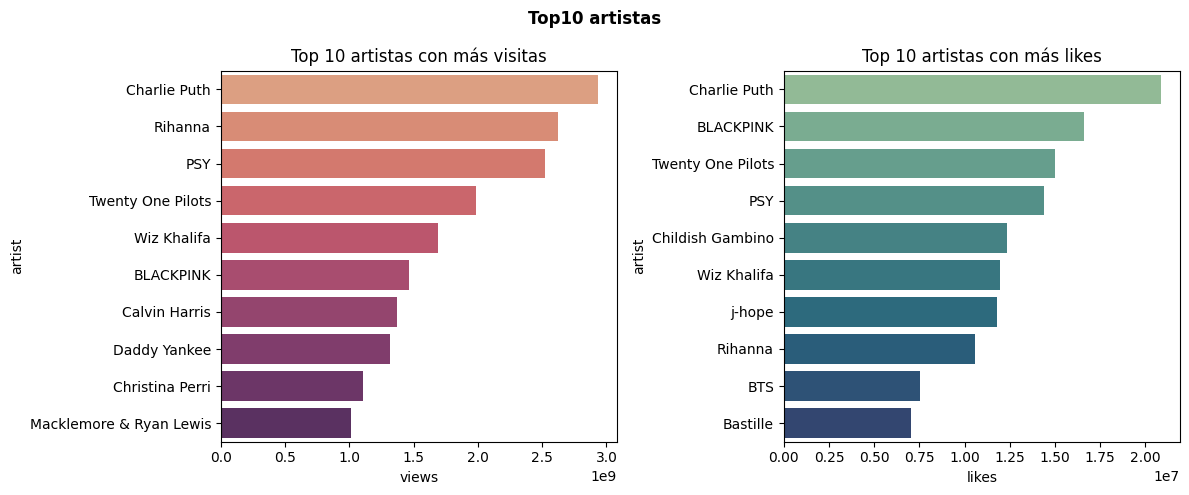

Artistas top10 en vistas y en likes:
0         Charlie Puth
1            BLACKPINK
2    Twenty One Pilots
3                  PSY
5          Wiz Khalifa
7              Rihanna
Name: artist, dtype: object


In [18]:
views_likes(df_single)

___
Ahora queremos analizar la colaboración entre artistas en la industria musical, se tienen datos de las colaboraciones realizadas en los últimos años. Se desea conocer cuáles son los artistas que han colaborado en mayor cantidad de canciones y generar un ranking con los diez primeros. ¿Qué artistas con los que más colaboraciones tienen?.
- Deberéis contestar a las siguientes preguntas:
    - ¿Cuáles son los diez artistas que más han colaborado según los datos que tenemos?
    - ¿Cuál es el número de canciones en los que ha colaborado el artista que ocupa el primer lugar en el ranking?
    - ¿Cuál es el artista que ocupa el décimo lugar en el ranking y en cuántas canciones ha colaborado?


Para esto tendréis que:
- Filtrad los datos para quedaros solo con aquellos datos donde en la columna "track" tengamos "feat".

In [19]:
df_colab = df[df['track'].str.contains('feat')]
df_colab.head(1)

,artist,url_spotify,track,album,album_type,uri,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,url_youtube,title,channel,views,likes,comments,description,licensed,official_video,stream
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,new gold (feat. tame impala and bootie brown),new gold (feat. tame impala and bootie brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.93,0.0522,0.0425,0.0469,0.116,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,gorillaz - new gold ft. tame impala & bootie b...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467.0


- Contad cuantas canciones tiene cada artista utilizando el dataframe generado en el paso anterior.

In [20]:
count_colab = df_colab['artist'].value_counts().reset_index()
count_colab.head(10)

,artist,count
0,Juicy J,10
1,Macklemore,10
2,Bibi und Tina,10
3,DJ Khaled,9
4,Ty Dolla Sign,9
5,Wu-Tang Clan,9
6,Wale,8
7,Wizkid,8
8,Mark Ronson,8
9,B.o.B,8


- Mostrad los resultados en una gráfica, seleccionado los 10 artistas con más colaboraciones.

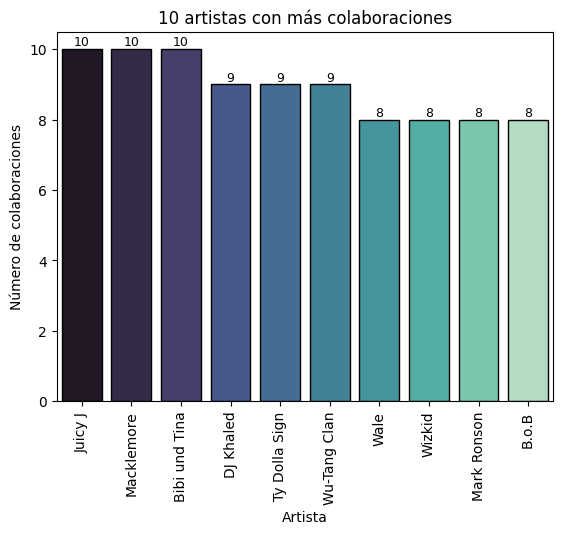

In [21]:
sns.countplot(x = "artist", data = df_colab, 
              order = df_colab['artist'].value_counts().iloc[:10].index, 
              palette="mako",
              edgecolor = 'black')
plt.xticks(rotation = 90)

plt.title('10 artistas con más colaboraciones')

plt.xlabel("Artista")
plt.ylabel("Número de colaboraciones")

for indice, valor in enumerate(count_colab["count"].head(10)):
    plt.text(indice, valor + 0.10, str(valor), 
             horizontalalignment = "center", fontsize = 9);

___
- Utilizando el dataframe original, queremos explorar si el tipo de álbum influye en la cantidad de vistas que recibe en una plataforma de transmisión de música. Para ello, debemos generar un boxplot con las variables necesarias y responder las siguientes preguntas:
    - ¿Qué tipo de álbumes tienden a tener más vistas en promedio?
    - ¿Hay algún tipo de álbumes que tenga una mayor dispersión en las vistas recibidas?
    - ¿Existen valores atípicos (outliers) en alguna categoría de álbumes?
    - ¿Qué conclusión se puede obtener sobre la relación entre el tipo de álbum y la cantidad de vistas recibidas?

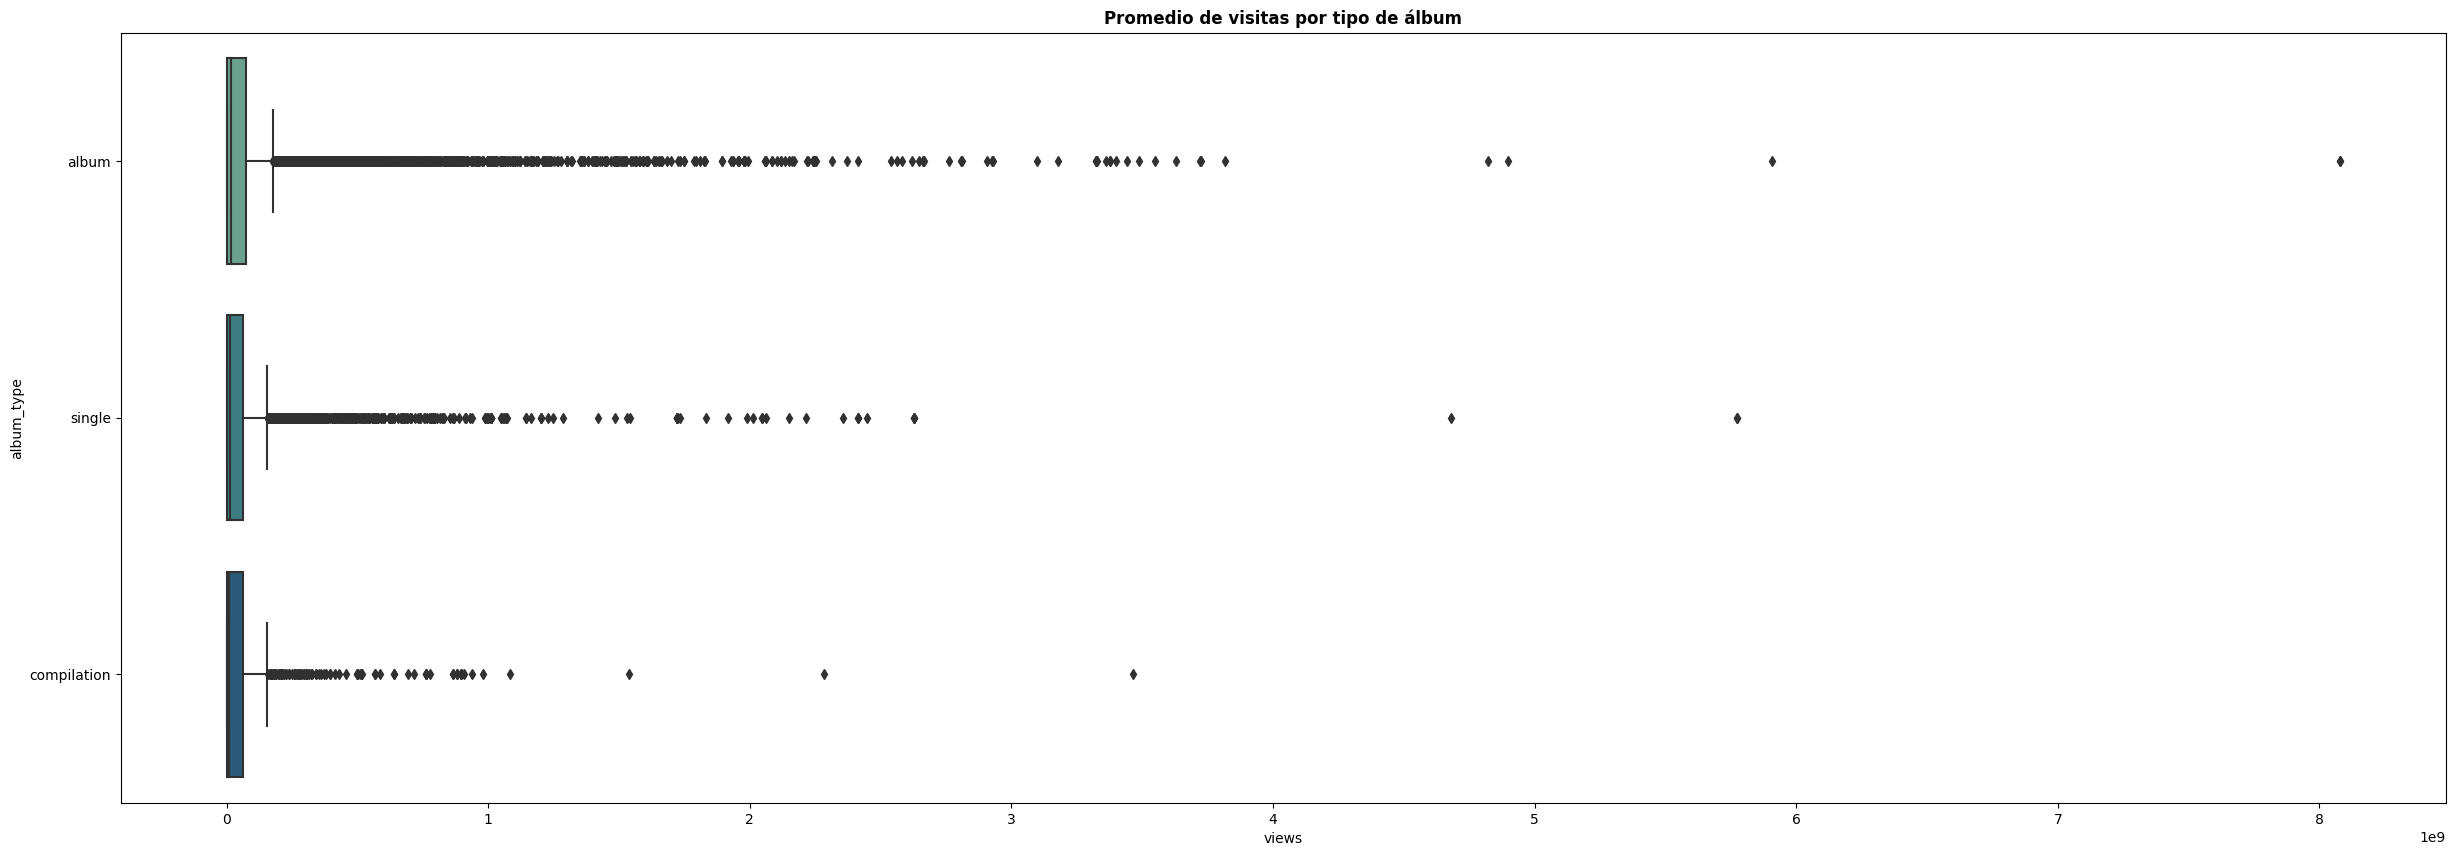

In [22]:
plt.figure(figsize = (30, 10))
sns.boxplot(y= 'album_type', x= 'views', data= df, palette= 'crest')
plt.title('Promedio de visitas por tipo de álbum', fontweight='bold');

Con este gráfico, podemos ver que tenemos bastantes valores atípicos, siendo en el tipo `album` donde los valores atípicos están más alejados de la media (además de ser superiores en número frente a los otros dos), seguido de los de tipo `single`.

Para poder analizar los promedios y desviación utilizando este boxplot, vamos a modificar la gráfica, quedándonos con las vistas hasta los bigotes superiores del boxplot.

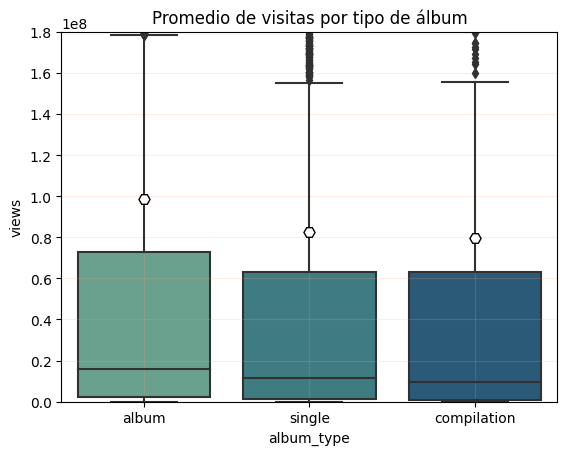

In [23]:
sns.boxplot(x = 'album_type', y= 'views', data = df, palette= 'crest',
            showmeans= True, meanprops= {'marker': 'H', 'markerfacecolor': 'white', 'markeredgecolor':'black', 'markersize':'8'})
plt.title('Promedio de visitas por tipo de álbum')
plt.ylim(0, 180000000)
plt.grid(alpha = 0.2, color = 'lightsalmon');


A la vista del gráfico, podemos ver que el tipo `album` es el que tiene, de media, mayor número de visitas, seguido del tipo `single` y, muy de cerca, del tipo `compilation`.
Por otro lado, con respecto a la homogeneidad de los datos (desviación típica), vamos a sacar estos valores en una tabla para poder analizarlos mejor:

In [24]:
df.groupby('album_type')['views'].describe()

,count,mean,std,min,25%,50%,75%,max
album_type,,,,,,,,
album,14619.0,9.842739e+07,2.858933e+08,0.0,2052173.00,15781710.0,72642342.50,8.079649e+09
compilation,769.0,7.961832e+07,2.196741e+08,71.0,656414.00,9569629.0,63125368.00,3.463816e+09
single,4860.0,8.269886e+07,2.461023e+08,28.0,1374965.25,11324830.0,63286504.75,5.773798e+09


Como podemos ver en la tabla, es el tipo `album` el que mayor desviación presenta con respecto a la media, seguido también del tipo `single` y siendo el tipo `compilation` el que menor desviación presenta.

De manera general, teniendo en cuenta todos los datos anteriores, podemos concluir que:

- El tipo de album que mayor dispersión presenta es el de tipo `album`, siendo además el que más visualizaciones tiene de media y el que mayor rango intercuartílico presenta.
- En el caso de los tipos `single` y `compilation`, ambos tienen datos muy similares en cuanto a promedio de visualizaciones y dispersión de los datos, siendo un poco superior en el tipo `single`.
- En los tres tipos encontramos un gran número de outliers, resaltando todos ellos por encima de los datos típicos (destacan por tener un número de visualizaciones muy por encima del resto de datos). Sin embargo, el tipo de datos que tiene un mayor número de outliers es el de tipo `album`, que es además el que tiene la canción con mayor número de visualizaciones.